<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-03-19 13:02:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
connected. to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... 
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  60.4MB/s    in 2.5s    

2025-03-19 13:02:39 (60.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



In [3]:
#copy of df original and drop missing values to calculate the extreme values
df_outliers=df.copy()

# Calculate IQR using the cleaned data
Q1 = df_outliers['ConvertedCompYearly'].quantile(0.25)
Q3 = df_outliers['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Count the number of extreme values
extreme_values = df_outliers[(df_outliers['ConvertedCompYearly'] < lower_bound) | (df_outliers['ConvertedCompYearly'] > upper_bound)]

# Print the number of extreme values
print(f'Number of extreme values: {extreme_values.shape[0]}')

# Print the percentage of extreme values
total_values = df_outliers.shape[0]
percentage_extreme = (extreme_values.shape[0] / total_values) * 100
print(f'Percentage of extreme values: {percentage_extreme:.2f}%')

Number of extreme values: 978
Percentage of extreme values: 1.49%


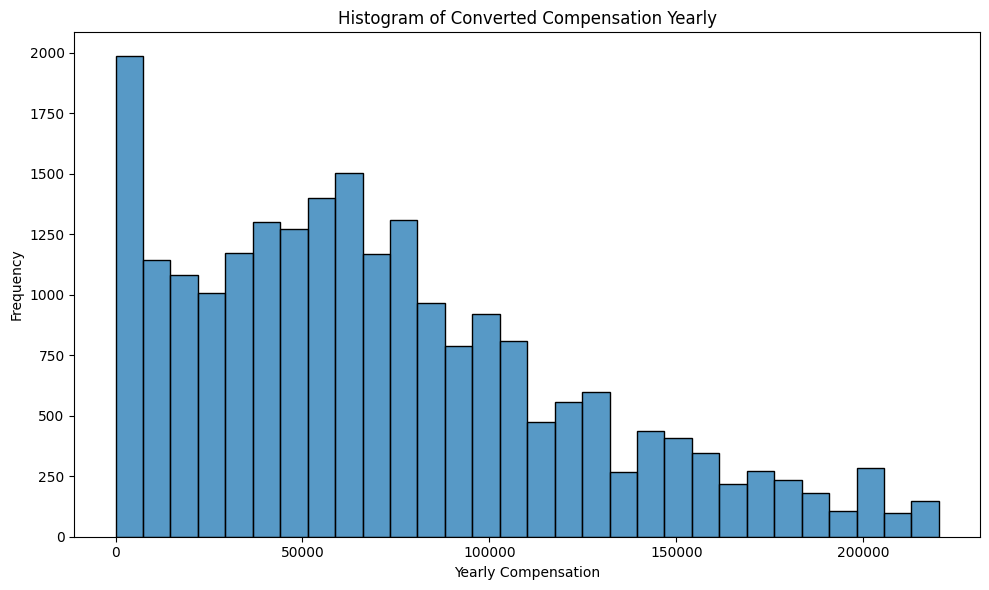

In [4]:
# Drop missing values
df_clean = df.dropna(subset=['ConvertedCompYearly'])

# Calculate IQR using the cleaned data
Q1 = df_clean['ConvertedCompYearly'].quantile(0.25)
Q3 = df_clean['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to exclude extreme values (outliers)
df_clean = df_clean[(df_clean['ConvertedCompYearly'] >= lower_bound) & (df_clean['ConvertedCompYearly'] <= upper_bound)]

# Create the plot
plt.figure(figsize=(10,6))
sns.histplot(df_clean['ConvertedCompYearly'], kde=False, bins=30)
plt.title('Histogram of Converted Compensation Yearly')
plt.xlabel('Yearly Compensation')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



/tmp/ipykernel_7805/4219213770.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new['Age'] = df_new['Age'].replace(age_mapping)


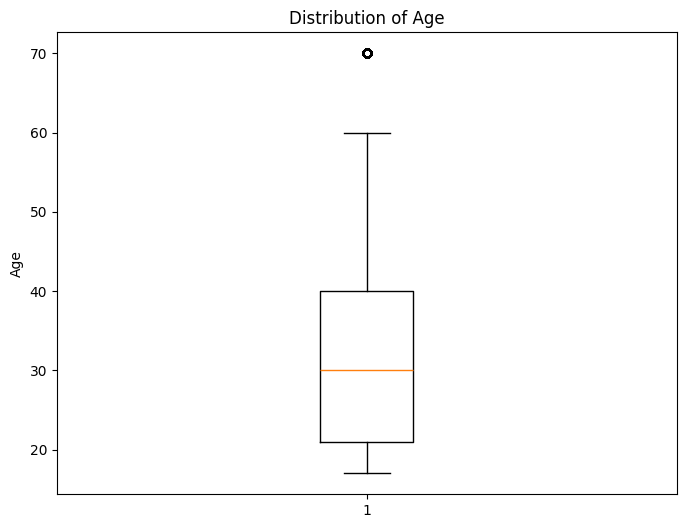

In [5]:
#create a new df
df_new = df.copy()

#mapping the Age 
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None 
}

#replace age 
df_new['Age'] = df_new['Age'].replace(age_mapping)

# drop the missing values
df_new = df_new.dropna(subset=['Age'])

#create boxplot
plt.figure(figsize=(8,6))
plt.boxplot(df_new['Age'])
plt.title('Distribution of Age')
plt.ylabel('Age')
plt.show()




### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



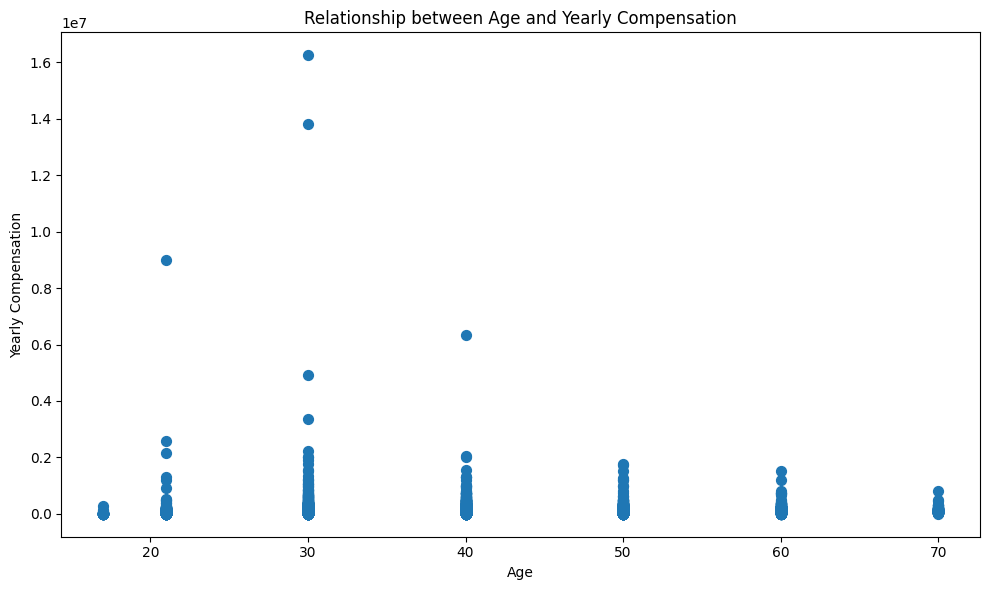

In [6]:
#Using df_new since the age mapping is done there (task 1.2)
df_new = df_new.dropna(subset=['ConvertedCompYearly']) 

# Replace Age values with the mapped numeric values
df_new['Age_numeric'] = df_new['Age'].replace(age_mapping)

# Drop missing values for both 'Age_numeric' and 'ConvertedCompYearly'
df_new = df_new.dropna(subset=['Age_numeric', 'ConvertedCompYearly'])

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(data=df_new, x='Age_numeric', y='ConvertedCompYearly', marker='o', s=50)
plt.title('Relationship between Age and Yearly Compensation')
plt.xlabel('Age')
plt.ylabel('Yearly Compensation')

plt.tight_layout()
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


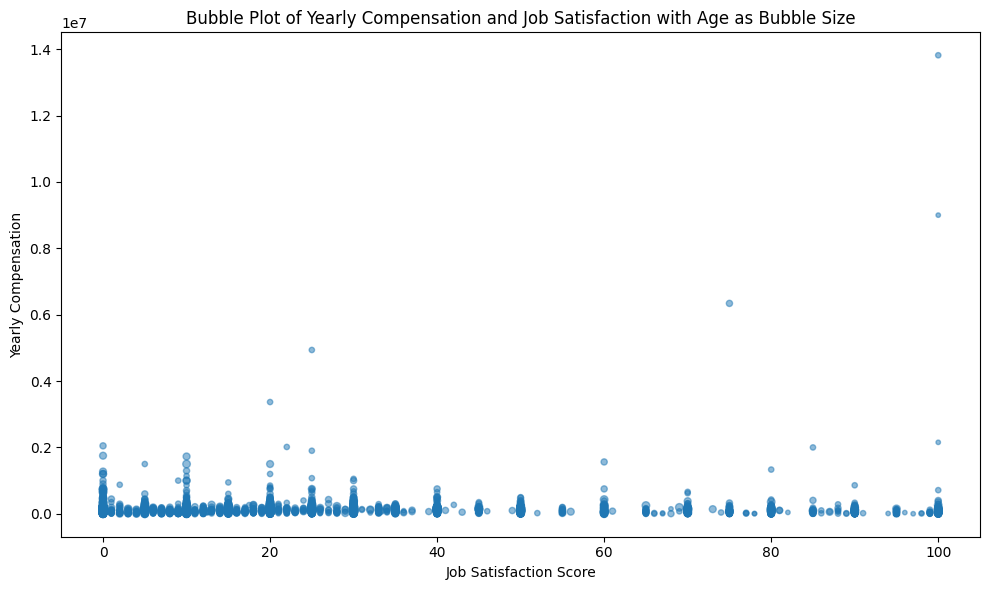

In [7]:
#Using the same df from task 2.1 (age numeric is added and Yearly Comp is clean and filtered)
# Drop missing values 
df_new = df_new.dropna(subset=['JobSatPoints_6', 'ConvertedCompYearly', 'Age_numeric'])

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(data=df_new, x='JobSatPoints_6', y='ConvertedCompYearly', 
            s = df_new['Age_numeric'] * 0.5 , alpha=0.5, marker='o')

plt.title('Bubble Plot of Yearly Compensation and Job Satisfaction with Age as Bubble Size')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Yearly Compensation')

plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



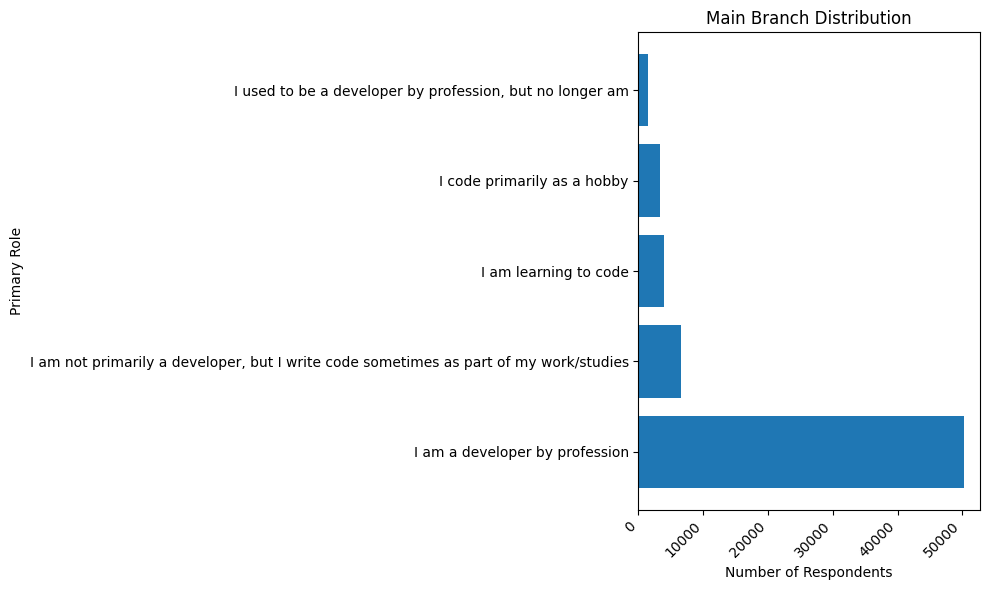

In [8]:
# the number of respondents in each industry
role_counts = df['MainBranch'].value_counts()
#Create a histogram
plt.figure(figsize=(10,6))
plt.barh(role_counts.index, role_counts.values)
plt.title('Main Branch Distribution')
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



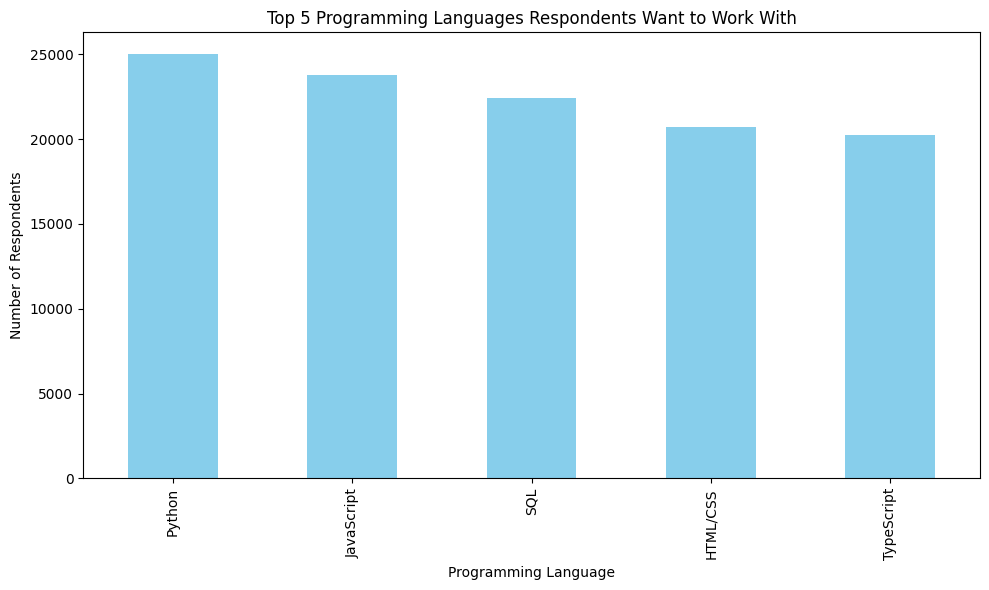

In [9]:
#missing values
df_lang =df.dropna(subset=['LanguageWantToWorkWith'])

#separate the answers with multiple values
df_lang_split = df_lang['LanguageWantToWorkWith'].str.split(';').explode()

#top 5 programming languages
top_languages = df_lang_split.value_counts().head(5)

#create the plot
plt.figure(figsize=(10,6)) 
top_languages.plot(kind='bar', color='skyblue')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')

plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


/tmp/ipykernel_7805/3927856953.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_age_sat['AgeGroup'] = df_age_sat['Age'].replace(age_mapping)


<Figure size 1000x600 with 0 Axes>

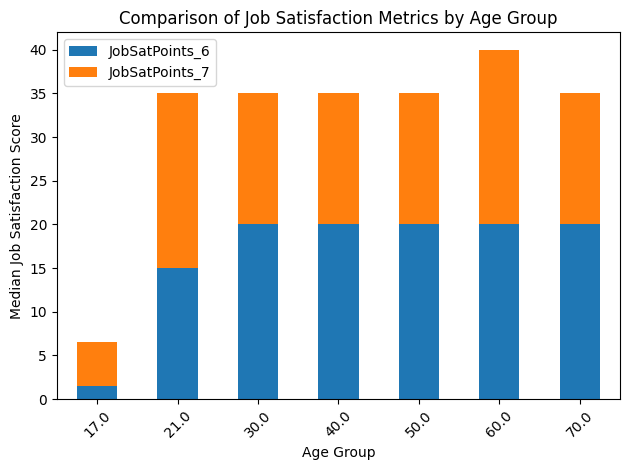

In [10]:
# Create a copy of the DataFrame
df_age_sat = df.copy()

# Age mapping to categorize ages into numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None 
}

# Create a new column AgeGroup with mapped numeric values based on Age
df_age_sat['AgeGroup'] = df_age_sat['Age'].replace(age_mapping)

# Drop missing values for AgeGroup and JobSatPoints
df_age_sat = df_age_sat.dropna(subset=['AgeGroup', 'JobSatPoints_6', 'JobSatPoints_7'])

# Group by AgeGroup and calculate the median JobSatPoints_6 and JobSatPoints_7
df_age_grouped = df_age_sat.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Create the plot
plt.figure(figsize=(10,6))
df_age_grouped.plot(kind='bar', stacked=True)
plt.title('Comparison of Job Satisfaction Metrics by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



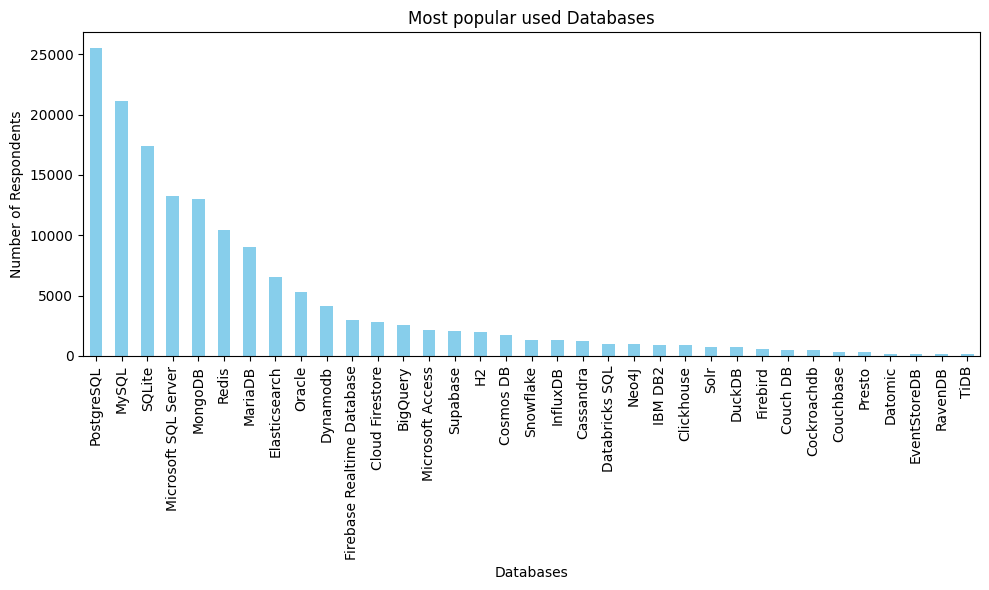

In [11]:
#missing values
df_data =df.dropna(subset=['DatabaseHaveWorkedWith'])

#separate the answers with multiple values
df_data_split = df_data['DatabaseHaveWorkedWith'].str.split(';').explode()

#count programming languages
database_counts = df_data_split.value_counts()


#create the plot
plt.figure(figsize=(10,6)) 
database_counts.plot(kind='bar', color='skyblue')
plt.title('Most popular used Databases')
plt.xlabel('Databases')
plt.ylabel('Number of Respondents')

plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_7805/3915846527.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_age_comp['AgeGroup'] = df_age_comp['Age'].replace(age_mapping)


<Figure size 1000x600 with 0 Axes>

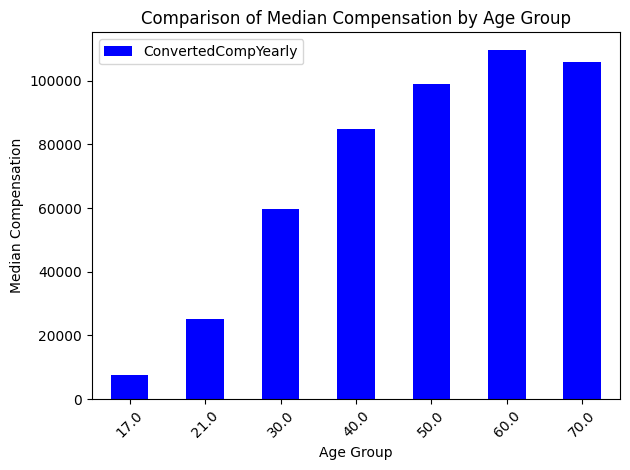

In [12]:
# Create a copy of the DataFrame
df_age_comp = df.copy()

# Age mapping to categorize ages into numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None 
}

# Create a new column AgeGroup with mapped numeric values based on Age
df_age_comp['AgeGroup'] = df_age_comp['Age'].replace(age_mapping)

# Drop missing values for AgeGroup and ConvertedCompYearly
df_age_comp = df_age_comp.dropna(subset=['AgeGroup', 'ConvertedCompYearly'])

# Group by AgeGroup and calculate the median ConvertedCompYearly
df_comp_median = df_age_comp.groupby('AgeGroup')[['ConvertedCompYearly']].median()

# Create the plot
plt.figure(figsize=(10,6))
df_comp_median.plot(kind='bar', color='blue')
plt.title('Comparison of Median Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



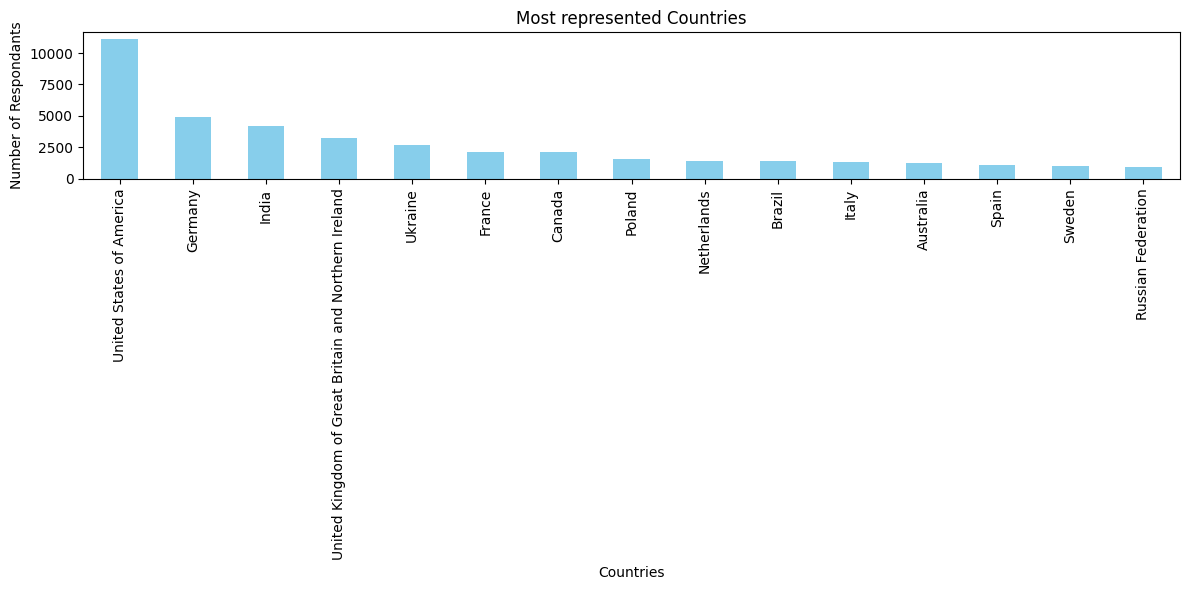

In [13]:
#new df
df_country =df.copy()

#drop missing values
df_country =df_country.dropna(subset=['Country']) 

# the number of respondents in each country
df_country_counts = df_country['Country'].value_counts().head(15)

#create the plot
plt.figure(figsize=(12,6)) 
df_country_counts.plot(kind = 'bar', color ='skyblue')
plt.title('Most represented Countries')
plt.xlabel('Countries')
plt.ylabel('Number of Respondants')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
